In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Final_Data_BDM_colab.csv")

In [ ]:
df.head()

,Sr.No.,Date,Company Name,City/Town,Sales,Items
0,1,07-08-2023,Seemati,Ernakulam,"₹ 1,51,862.00",244.0
1,2,07-08-2023,Seemati,Kottayam,"₹ 94,080.00",193.0
2,3,07-08-2023,Varikat Brothers,Kottayam,"₹ 63,714.00",122.0
3,4,09-08-2023,Pulimoottil Silks & Sarees,Tiruvallur,"₹ 1,58,109.00",303.0
4,5,10-08-2023,Pulimoottil Silks,Thodupuzha,"₹ 93,324.00",164.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sr.No.        143 non-null    int64  
 1   Date          143 non-null    object 
 2   Company Name  143 non-null    object 
 3   City/Town     143 non-null    object 
 4   Sales         143 non-null    object 
 5   Items         143 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.8+ KB


In [ ]:
df['Sales'] = df['Sales'].replace({'₹': '', ',': ''}, regex=True)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

In [ ]:
df = df.drop('Sr.No.',axis = 1)

In [ ]:
df.head()

,Date,Company Name,City/Town,Sales,Items
0,07-08-2023,Seemati,Ernakulam,151862.0,244.0
1,07-08-2023,Seemati,Kottayam,94080.0,193.0
2,07-08-2023,Varikat Brothers,Kottayam,63714.0,122.0
3,09-08-2023,Pulimoottil Silks & Sarees,Tiruvallur,158109.0,303.0
4,10-08-2023,Pulimoottil Silks,Thodupuzha,93324.0,164.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          143 non-null    object 
 1   Company Name  143 non-null    object 
 2   City/Town     143 non-null    object 
 3   Sales         143 non-null    float64
 4   Items         143 non-null    float64
dtypes: float64(2), object(3)
memory usage: 5.7+ KB


In [ ]:
df.describe()

,Sales,Items
count,143.000000,143.000000
mean,56260.153846,114.692308
std,26576.409625,51.863205
min,2381.000000,4.000000
25%,38212.500000,72.500000
50%,51660.000000,108.000000
75%,68444.500000,146.500000
max,158109.000000,303.000000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Year'] = df['Date'].dt.year

In [ ]:
# Interaction features
df['Items_Month'] = df['Items'] * df['Month']
df['Items_DayOfWeek'] = df['Items'] * df['DayOfWeek']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             143 non-null    datetime64[ns]
 1   Company Name     143 non-null    object        
 2   City/Town        143 non-null    object        
 3   Sales            143 non-null    float64       
 4   Items            143 non-null    float64       
 5   Month            143 non-null    int32         
 6   DayOfWeek        143 non-null    int32         
 7   Year             143 non-null    int32         
 8   Items_Month      143 non-null    float64       
 9   Items_DayOfWeek  143 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(3), object(2)
memory usage: 9.6+ KB


<ipython-input-13-c94ba74a6af5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df['Sales'], palette='Set2')


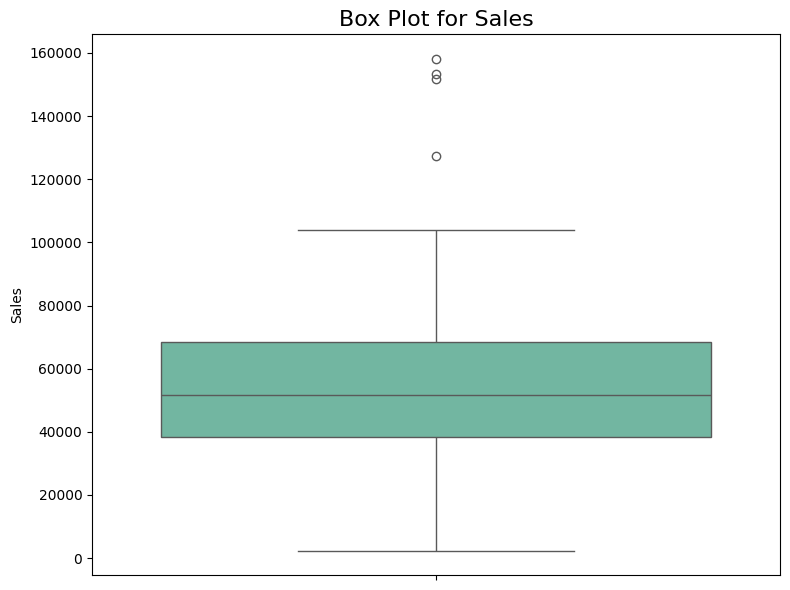

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Sales'], palette='Set2')
plt.title('Box Plot for Sales', fontsize=16)
plt.tight_layout()
plt.show()


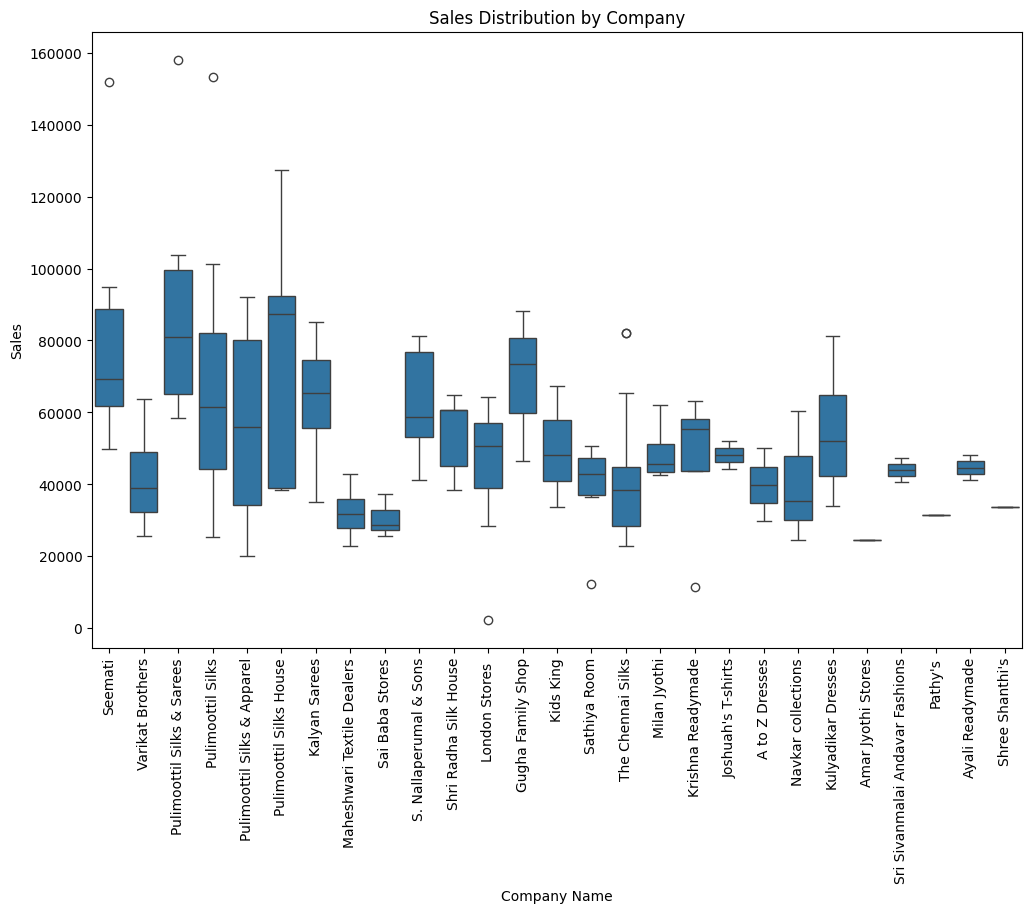

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Company Name', y='Sales')
plt.xticks(rotation=90)
plt.title('Sales Distribution by Company')
plt.show()

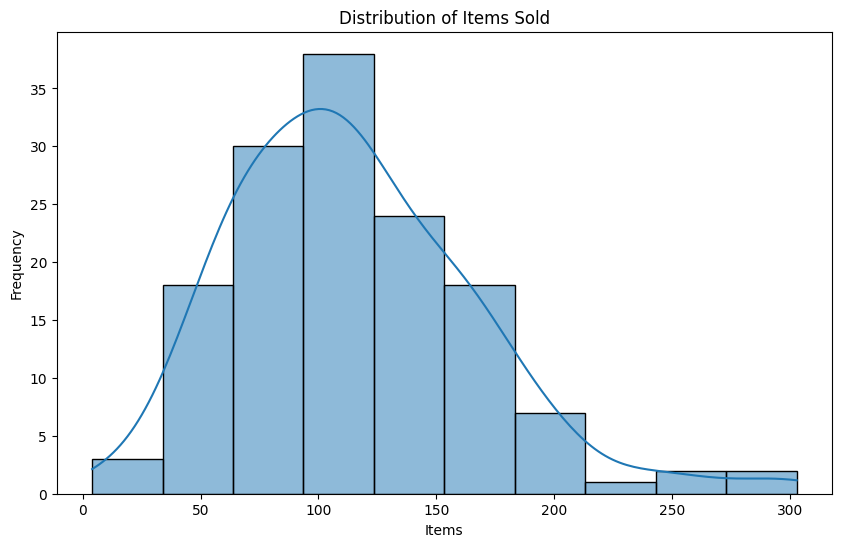

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Items'], bins=10, kde=True)
plt.title('Distribution of Items Sold')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.show()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Items'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Items_Month'}>,
        <Axes: title={'center': 'Items_DayOfWeek'}>, <Axes: >]],
      dtype=object)

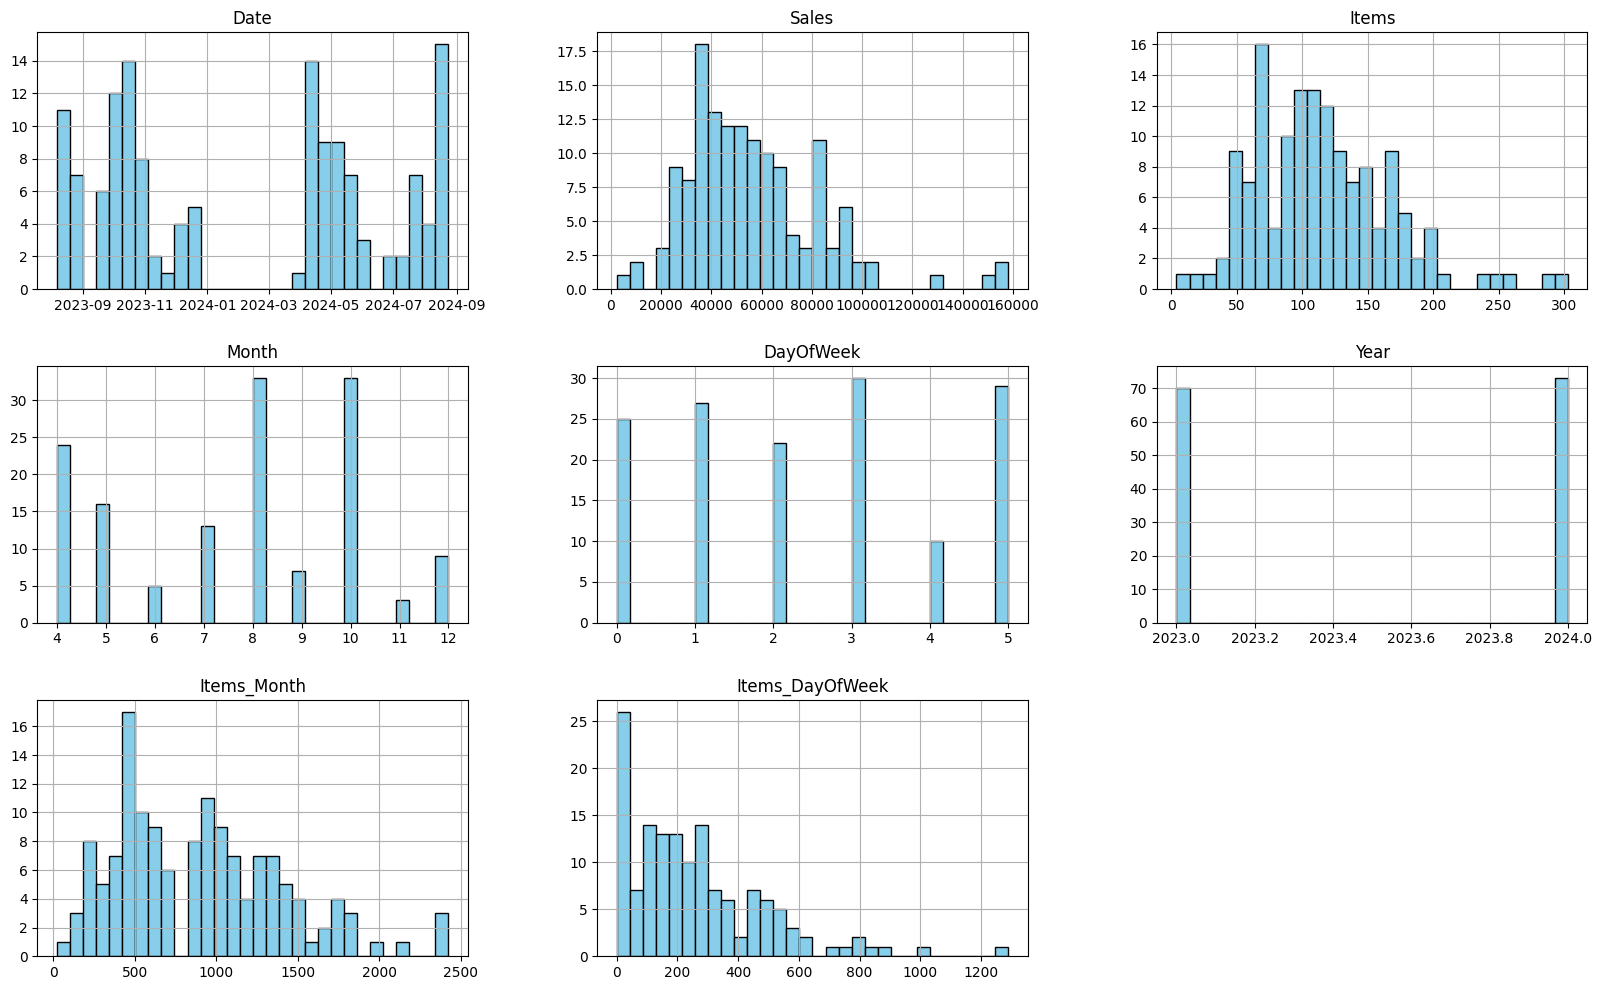

In [ ]:
df.hist(bins = 30,color = 'skyblue',edgecolor = 'black',figsize = (20,12))

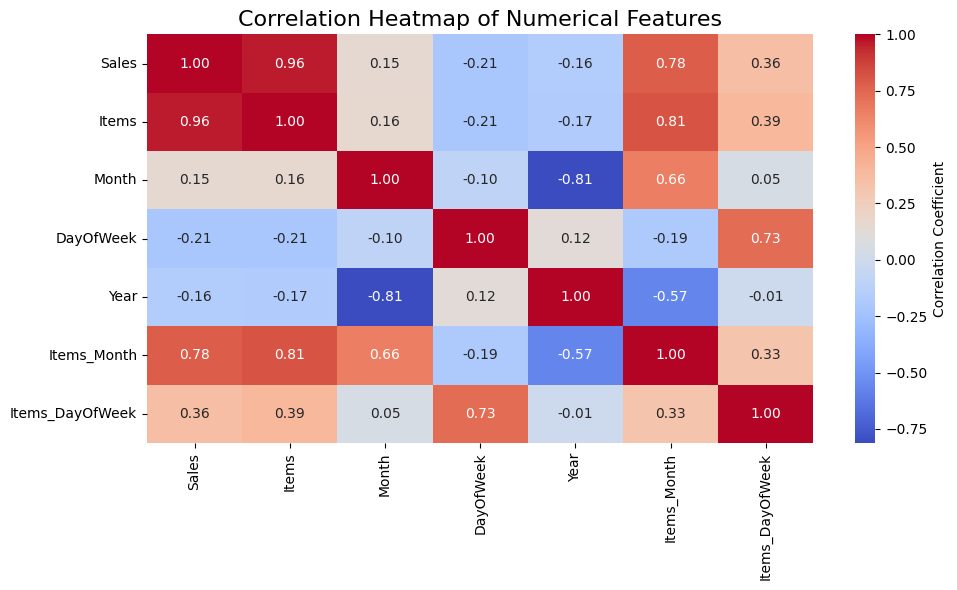

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-18-ae049d83e112>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('flare')
<ipython-input-18-ae049d83e112>:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


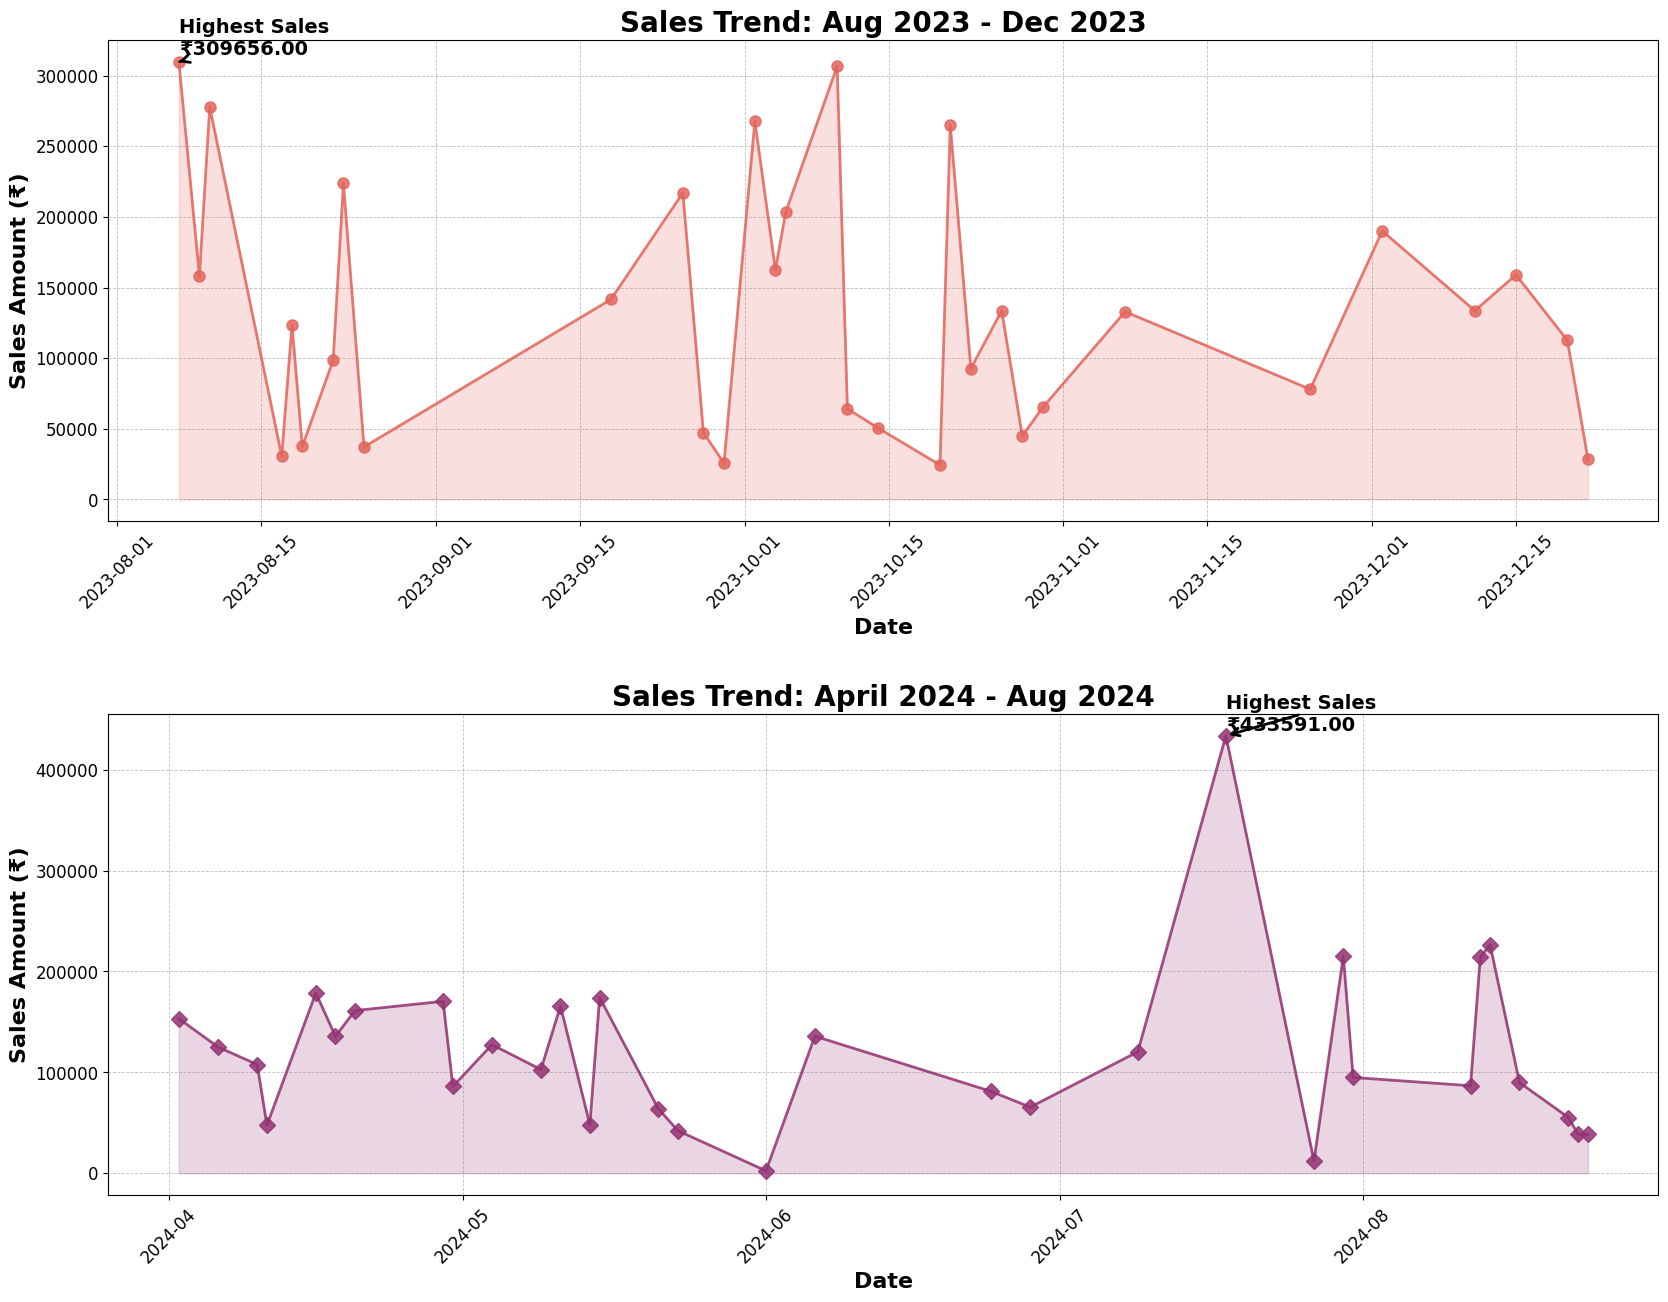

In [ ]:
import matplotlib.cm as cm
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
mask1 = (daily_sales['Date'] >= '2023-08-01') & (daily_sales['Date'] <= '2023-12-31')
mask2 = (daily_sales['Date'] >= '2024-04-01') & (daily_sales['Date'] <= '2024-08-31')

sales_2023 = daily_sales[mask1]
sales_2024 = daily_sales[mask2]

cmap = cm.get_cmap('flare')


color_2023 = cmap(0.3)
color_2024 = cmap(0.7)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15), gridspec_kw={'hspace': 0.4})

axes[0].plot(sales_2023['Date'], sales_2023['Sales'], marker='o', linestyle='-', color=color_2023, linewidth=2, markersize=8, alpha=0.85)
axes[0].fill_between(sales_2023['Date'], sales_2023['Sales'], color=color_2023, alpha=0.2)

axes[0].set_title('Sales Trend: Aug 2023 - Dec 2023', fontsize=20, weight='bold')
axes[0].set_xlabel('Date', fontsize=16, weight='bold')
axes[0].set_ylabel('Sales Amount (₹)', fontsize=16, weight='bold')

axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.6, color='gray', alpha=0.5)
max_sales_2023 = sales_2023.loc[sales_2023['Sales'].idxmax()]
axes[0].annotate(f'Highest Sales\n₹{max_sales_2023["Sales"]:.2f}',
                 xy=(max_sales_2023['Date'], max_sales_2023['Sales']),
                 xytext=(max_sales_2023['Date'], max_sales_2023['Sales'] + 5000),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                 fontsize=14, color='black', weight='bold')


axes[1].plot(sales_2024['Date'], sales_2024['Sales'], marker='D', linestyle='-', color=color_2024, linewidth=2, markersize=8, alpha=0.85)
axes[1].fill_between(sales_2024['Date'], sales_2024['Sales'], color=color_2024, alpha=0.2)

axes[1].set_title('Sales Trend: April 2024 - Aug 2024', fontsize=20, weight='bold')
axes[1].set_xlabel('Date', fontsize=16, weight='bold')
axes[1].set_ylabel('Sales Amount (₹)', fontsize=16, weight='bold')

axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)

axes[1].grid(True, which='both', linestyle='--', linewidth=0.6, color='gray', alpha=0.5)


max_sales_2024 = sales_2024.loc[sales_2024['Sales'].idxmax()]
axes[1].annotate(f'Highest Sales\n₹{max_sales_2024["Sales"]:.2f}',
                 xy=(max_sales_2024['Date'], max_sales_2024['Sales']),
                 xytext=(max_sales_2024['Date'], max_sales_2024['Sales'] + 5000),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                 fontsize=14, color='black', weight='bold')


plt.tight_layout()

plt.show()


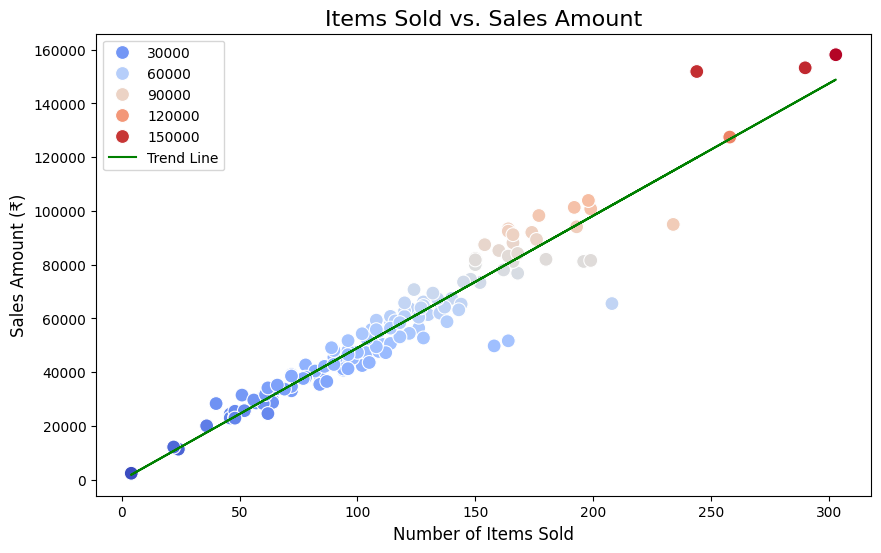

In [ ]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Items', y='Sales', hue='Sales', palette='coolwarm', s=100)
X = df['Items'].values.reshape(-1, 1)
y = df['Sales'].values

model = LinearRegression()
model.fit(X, y)
predicted_sales = model.predict(X)

plt.plot(df['Items'], predicted_sales, color='green', label='Trend Line')

plt.title('Items Sold vs. Sales Amount', fontsize=16)
plt.xlabel('Number of Items Sold', fontsize=12)
plt.ylabel('Sales Amount (₹)', fontsize=12)
plt.legend()
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize
lower_percentile = 0.01
upper_percentile = 0.01
df['Sales'] = winsorize(df['Sales'], limits=(lower_percentile, upper_percentile))
print("After Winsorization:")
print(df['Sales'].describe())

After Winsorization:
count       143.000000
mean      56288.734266
std       26329.634314
min       11340.000000
25%       38212.500000
50%       51660.000000
75%       68444.500000
max      153237.000000
Name: Sales, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:
# Apply log transformation to Sales
df['Log_Sales'] = np.log1p(df['Sales'])  # Using log1p to handle zero sales
df['Items_Month'] = np.log1p(df['Items_Month'])
df['Items_DayOfWeek'] = np.log1p(df['Items_DayOfWeek'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             143 non-null    datetime64[ns]
 1   Company Name     143 non-null    object        
 2   City/Town        143 non-null    object        
 3   Sales            143 non-null    float64       
 4   Items            143 non-null    float64       
 5   Month            143 non-null    int32         
 6   DayOfWeek        143 non-null    int32         
 7   Year             143 non-null    int32         
 8   Items_Month      143 non-null    float64       
 9   Items_DayOfWeek  143 non-null    float64       
 10  Log_Sales        143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int32(3), object(2)
memory usage: 10.7+ KB


In [ ]:
#from sklearn.model_selection import train_test_split

#X = df.drop(columns=['Sales', 'Date',])
#y = df['Sales']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

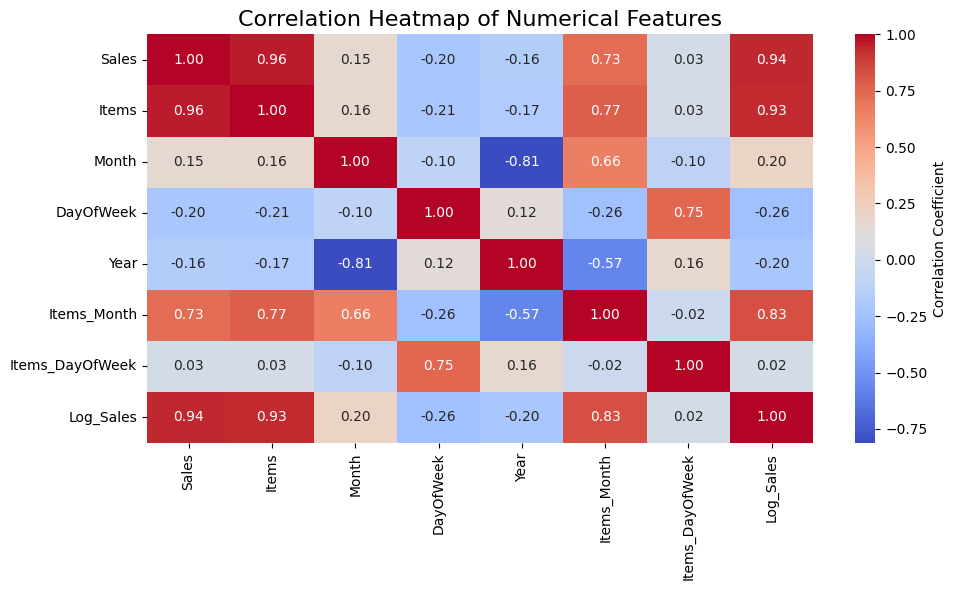

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Correlation heatmap for all numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Sales', 'Date','Log_Sales'])
y = df['Log_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
categorical_cols = ['Company Name', 'City/Town']
numerical_cols = ['Items', 'Month', 'DayOfWeek', 'Items_Month', 'Items_DayOfWeek']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

X_train_final = pd.concat([X_train_scaled_df, X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_encoded_df], axis=1)

X_train_final.reset_index(drop=True, inplace=True)
X_test_final.reset_index(drop=True, inplace=True)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8),
}

for model_name, model in models.items():
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} R2 Score: {r2}")

Linear Regression MSE: 0.0647100068131193
Linear Regression R2 Score: 0.7888998569375356
Ridge MSE: 0.03582410330973331
Ridge R2 Score: 0.8831328614195727
Lasso MSE: 0.31383920471659865
Lasso R2 Score: -0.023821573773227023
ElasticNet MSE: 0.31383920471659865
ElasticNet R2 Score: -0.023821573773227023
SVR MSE: 0.1026390388679794
SVR R2 Score: 0.6651659170520825
KNN MSE: 0.055965326445048695
KNN R2 Score: 0.8174271801082228
Decision Tree MSE: 0.013188364540725027
Decision Tree R2 Score: 0.9569762734016195
Random Forest MSE: 0.02293980068475831
Random Forest R2 Score: 0.9251646623935278
Gradient Boosting MSE: 0.01566632000292336
Gradient Boosting R2 Score: 0.9488925661307615
XGBoost MSE: 0.008565499273713476
XGBoost R2 Score: 0.9720572101420988


In [ ]:
lr = LinearRegression()
lr.fit(X_train_final, y_train)
y_pred_lr = lr.predict(X_test_final)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2 Score:", r2_score(y_test,y_pred_lr))

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_final, y_train)
y_pred_ridge = ridge.predict(X_test_final)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R2 Score:", r2_score(y_test, y_pred_ridge))

xgb_model = xgb.XGBRegressor(random_state=42,colsample_bytree = 0.8, learning_rate = 0.05, max_depth = 3, n_estimators=200, subsample=0.8)
xgb_model.fit(X_train_final, y_train)
y_pred_xgb = xgb_model.predict(X_test_final)
print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R2 Score:",r2_score(y_test,y_pred_xgb))

Linear Regression MSE: 0.0647100068131193
Linear Regression R2 Score: 0.7888998569375356
Ridge Regression MSE: 0.03582410330973331
Ridge Regression R2 Score: 0.8831328614195727
XGBoost MSE: 0.008565499273713476
XGBoost R2 Score: 0.9720572101420988


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()


lr.fit(X_train_final, y_train)

y_pred_train = lr.predict(X_train_final)
y_pred_test = lr.predict(X_test_final)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train}")
print(f"Training R2 Score: {r2_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R2 Score: {r2_test}")

if mse_train < mse_test and r2_train > r2_test:
    print("The model may be overfitting. Training performance is significantly better than test performance.")
else:
    print("The model does not appear to be overfitting.")


Training MSE: 0.008699026739852437
Training R2 Score: 0.9572029146886788
Test MSE: 0.0647100068131193
Test R2 Score: 0.7888998569375356
The model may be overfitting. Training performance is significantly better than test performance.


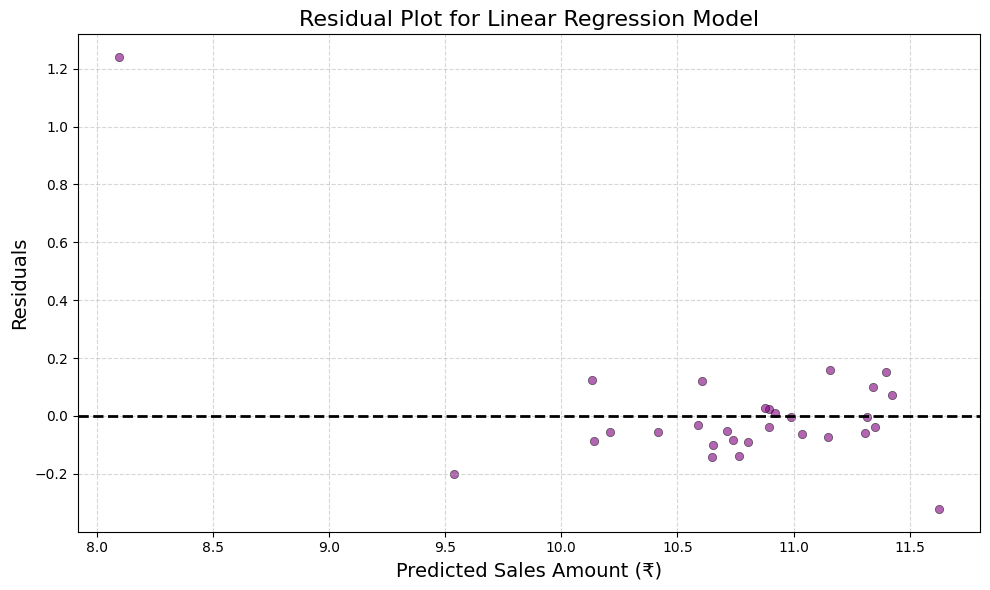

In [ ]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals, color='purple', alpha=0.6, edgecolors='black', linewidth=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Residual Plot for Linear Regression Model', fontsize=16)
plt.xlabel('Predicted Sales Amount (₹)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

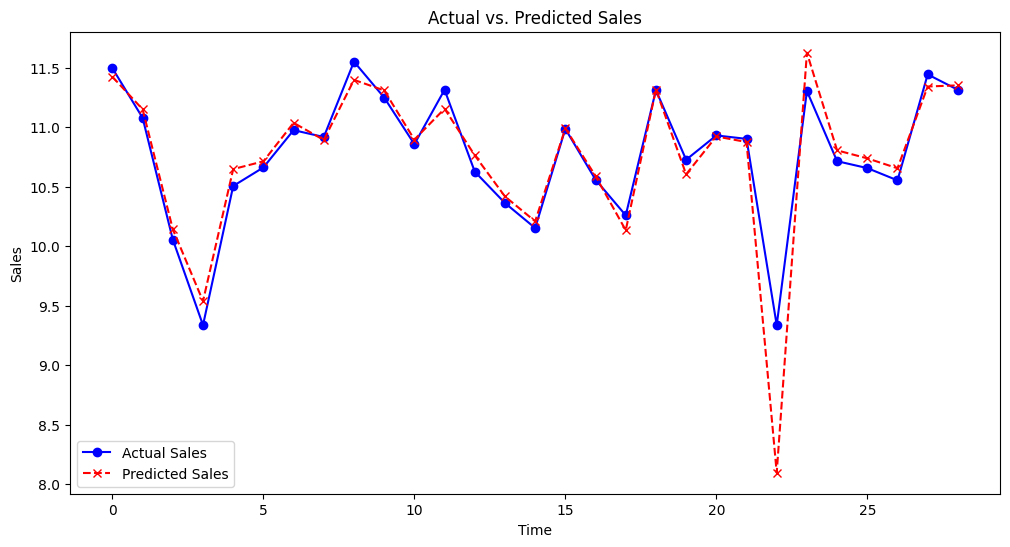

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales', marker='o', color='b')
plt.plot(y_pred_lr, label='Predicted Sales', marker='x', linestyle='--', color='r')
plt.title("Actual vs. Predicted Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


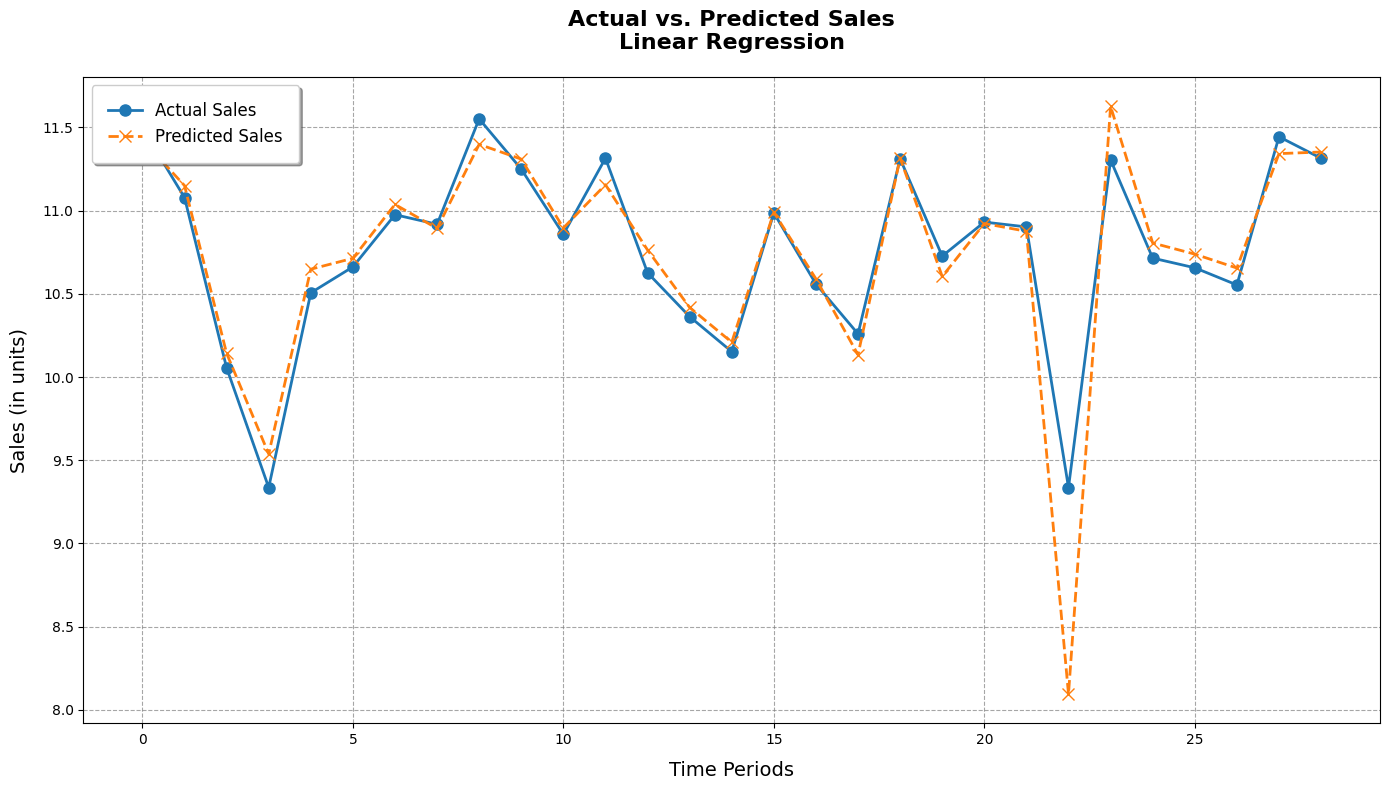

In [ ]:
x = np.arange(len(y_test))

plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-deep')

plt.plot(
    x, y_test.values, label='Actual Sales',
    marker='o', color='#1f77b4', markersize=8, linewidth=2
)

plt.plot(
    x, y_pred_lr, label='Predicted Sales',
    marker='x', linestyle='--', color='#ff7f0e', markersize=8, linewidth=2
)

plt.title("Actual vs. Predicted Sales\nLinear Regression", fontsize=16, fontweight='bold', pad=20)

plt.xlabel("Time Periods", fontsize=14, labelpad=10)
plt.ylabel("Sales (in units)", fontsize=14, labelpad=10)

plt.grid(color='gray', linestyle='dashed', alpha=0.7)

plt.legend(
    loc='upper left', fontsize=12,
    frameon=True, shadow=True, borderpad=1
)

plt.tight_layout()
plt.show()


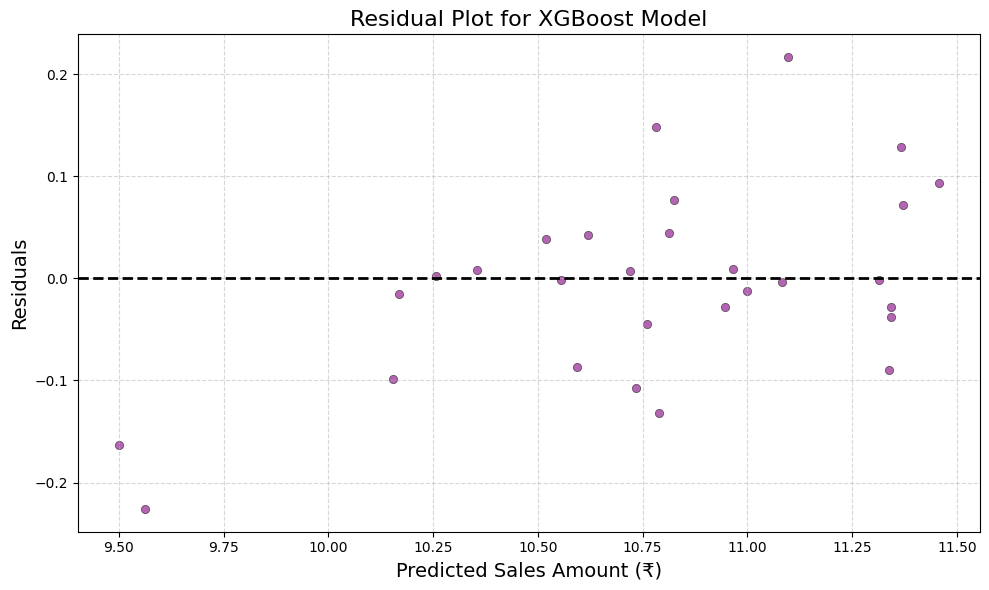

In [ ]:
residuals = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb, residuals, color='purple', alpha=0.6, edgecolors='black', linewidth=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.title('Residual Plot for XGBoost Model', fontsize=16)
plt.xlabel('Predicted Sales Amount (₹)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    param_grid,
    scoring=mse_scorer,
    cv=5
)

ridge_grid.fit(X_train_final, y_train)
print("Best Parameters:", ridge_grid.best_params_)
print("Best Negative MSE:", ridge_grid.best_score_)
print("Best MSE:", -ridge_grid.best_score_)


Best Parameters: {'alpha': 1.0, 'solver': 'svd'}
Best Negative MSE: -0.017919483557309025
Best MSE: 0.017919483557309025


In [ ]:
ridge = Ridge(alpha=1.0,solver = 'svd')
ridge.fit(X_train_final, y_train)
y_pred_ridge = ridge.predict(X_test_final)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Regression R2 Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression MSE: 0.035824103309732784
Ridge Regression R2 Score: 0.8831328614195744


In [ ]:
data = {
    'Actual Value': y_test,
    'Predicted Value': y_pred_xgb
}


prediction_table = pd.DataFrame(data)
print(prediction_table.shape)
print(prediction_table)

(29, 2)
     Actual Value  Predicted Value
117     11.495586        11.367411
19      11.078521        11.082476
82      10.055608        10.153951
97       9.336180         9.562231
56      10.505971        10.592809
12      10.661814        10.619226
131     10.975465        10.966566
65      10.917758        10.945668
66      11.551069        11.457475
18      11.249350        11.338659
51      10.857325        10.813254
78      11.314804        11.097923
94      10.626533        10.733918
132     10.362778        10.354819
100     10.152572        10.168365
64      10.986191        10.998542
27      10.558907        10.519955
69      10.259377        10.257019
125     11.311727        11.313100
73      10.726566        10.719192
11      10.930998        10.782425
119     10.902022        10.825690
110      9.336180         9.499882
113     11.304510        11.342051
55      10.714507        10.759567
45      10.656388        10.788762
9       10.553336        10.554924
4       11.4

<Figure size 1500x1500 with 0 Axes>

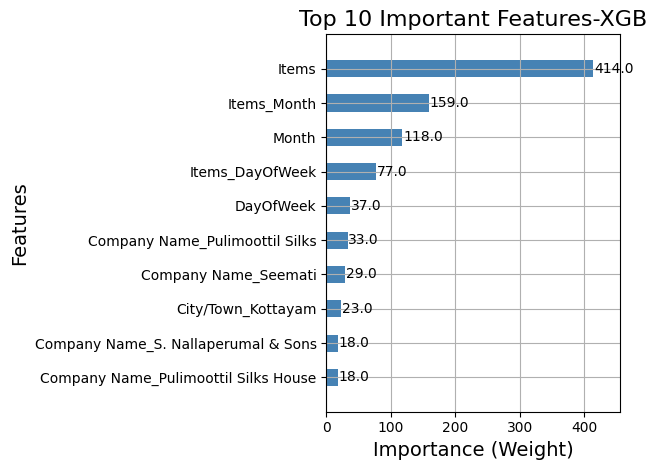

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
plt.figure(figsize=(15, 15))

xgb.plot_importance(xgb_model,
                    importance_type='weight',
                    max_num_features=10,
                    title='Feature Importance from XGBoost',
                    color='steelblue',
                    height=0.5,
                    grid=True,
                    show_values=True)

plt.title('Top 10 Important Features-XGB', fontsize=16)
plt.xlabel('Importance (Weight)', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor(random_state=42, colsample_bytree=0.8, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8)

xgb_model.fit(X_train_final, y_train)

y_pred_train_xgb = xgb_model.predict(X_train_final)
y_pred_test_xgb = xgb_model.predict(X_test_final)

mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

print(f"Training MSE (XGBoost): {mse_train_xgb}")
print(f"Training R2 Score (XGBoost): {r2_train_xgb}")
print(f"Test MSE (XGBoost): {mse_test_xgb}")
print(f"Test R2 Score (XGBoost): {r2_test_xgb}")

if mse_train_xgb < mse_test_xgb and r2_train_xgb > r2_test_xgb:
    print("The model may be overfitting. Training performance is significantly better than test performance.")
else:
    print("The model does not appear to be overfitting.")


Training MSE (XGBoost): 0.001474341613226249
Training R2 Score (XGBoost): 0.9927465996270354
Test MSE (XGBoost): 0.008565499273713476
Test R2 Score (XGBoost): 0.9720572101420988
The model may be overfitting. Training performance is significantly better than test performance.


In [ ]:
#from sklearn.model_selection import GridSearchCV


#xgb_model = xgb.XGBRegressor(random_state=42)

#param_grid = {
#    'n_estimators': [100, 200, 300],  # Number of trees
#    'max_depth': [3, 4, 5],            # Maximum depth of the tree
#    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
#    'subsample': [0.7, 0.8, 0.9],      # Subsample ratio of the training data
#    'colsample_bytree': [0.7, 0.8, 0.9],  # Fraction of features to use per tree
#    'alpha': [0, 0.1, 1],              # L1 regularization term
#    'lambda': [1, 1.5, 2]              # L2 regularization term
#}

#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
#                          scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)


#grid_search.fit(X_train_final, y_train)


#print("Best parameters found: ", grid_search.best_params_)


#best_xgb_model = grid_search.best_estimator_


#y_pred_train = best_xgb_model.predict(X_train_final)
#y_pred_test = best_xgb_model.predict(X_test_final)


#mse_train = mean_squared_error(y_train, y_pred_train)
#r2_train = r2_score(y_train, y_pred_train)
#mse_test = mean_squared_error(y_test, y_pred_test)
#r2_test = r2_score(y_test, y_pred_test)


#print(f"Training MSE: {mse_train}")
#print(f"Training R2 Score: {r2_train}")
#print(f"Test MSE: {mse_test}")
#print(f"Test R2 Score: {r2_test}")


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best parameters found:  {'alpha': 0, 'colsample_bytree': 0.8, 'lambda': 2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Training MSE: 0.002144087427356198
Training R2 Score: 0.9894516139233007
Test MSE: 0.010447737673983713
Test R2 Score: 0.9659168801507542

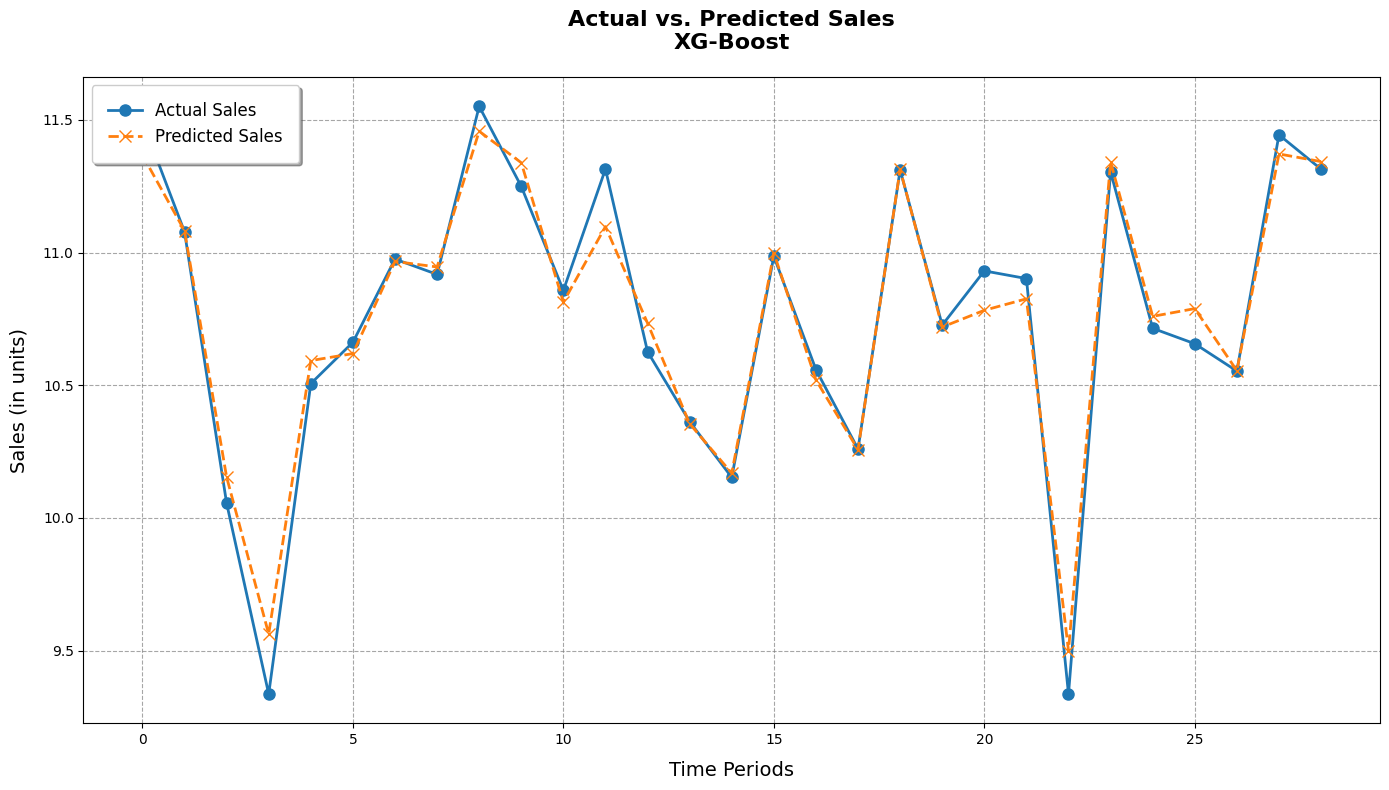

In [ ]:
x = np.arange(len(y_test))

plt.figure(figsize=(14, 8))
plt.style.use('seaborn-v0_8-deep')

plt.plot(
    x, y_test.values, label='Actual Sales',
    marker='o', color='#1f77b4', markersize=8, linewidth=2
)

plt.plot(
    x, y_pred_xgb, label='Predicted Sales',
    marker='x', linestyle='--', color='#ff7f0e', markersize=8, linewidth=2
)

plt.title("Actual vs. Predicted Sales\nXG-Boost", fontsize=16, fontweight='bold', pad=20)

plt.xlabel("Time Periods", fontsize=14, labelpad=10)
plt.ylabel("Sales (in units)", fontsize=14, labelpad=10)

plt.grid(color='gray', linestyle='dashed', alpha=0.7)

plt.legend(
    loc='upper left', fontsize=12,
    frameon=True, shadow=True, borderpad=1
)

plt.tight_layout()
plt.show()
